In [45]:
# Import libraries that we'll need...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib

In [2]:
# Import data (I uploaded a copy to blackboard) and see what's in it
df_leuk = pd.read_csv('leukemia_big.csv')
df_leuk.head()

,ALL,ALL.1,ALL.2,ALL.3,ALL.4,ALL.5,ALL.6,ALL.7,ALL.8,ALL.9,...,AML.15,AML.16,AML.17,AML.18,AML.19,AML.20,AML.21,AML.22,AML.23,AML.24
0,-1.533622,-0.867610,-0.433172,-1.671903,-1.187689,-1.127234,-1.045409,-0.106917,-1.198796,-1.190899,...,-0.436650,-1.274708,-0.681458,-0.876610,-0.624022,-0.431628,-1.435259,-0.671954,-1.013161,-0.969482
1,-1.235673,-1.275501,-1.184492,-1.596424,-1.335256,-1.113730,-0.800880,-0.745177,-0.849312,-1.190899,...,-0.915483,-1.354363,-0.653559,-1.096250,-1.066594,-1.335256,-1.204586,-0.751457,-0.889592,-1.080988
2,-0.333983,0.375927,-0.459196,-1.422571,-0.797493,-1.362768,-0.671954,-1.175674,0.320813,0.646610,...,-0.736156,-0.022153,-0.037455,-0.567335,-1.100749,-0.552938,-0.948874,-0.231657,-0.742163,-0.779500
3,0.488702,0.444011,0.436264,0.193353,0.235632,-0.360312,0.184941,0.425653,0.333983,0.235270,...,0.083781,0.356562,0.416241,0.533986,0.227505,0.416816,0.408202,0.326556,0.361813,0.298864
4,-1.300893,-1.229660,-1.325882,-1.818329,-1.311206,-1.513975,-1.651624,-1.339555,-0.593132,0.133302,...,-1.547444,-1.264475,-1.512318,-1.469583,-1.283472,-0.977672,-1.090178,-1.545120,-1.174272,-1.443183


ALL Scores
mean: 0.7524793960638297


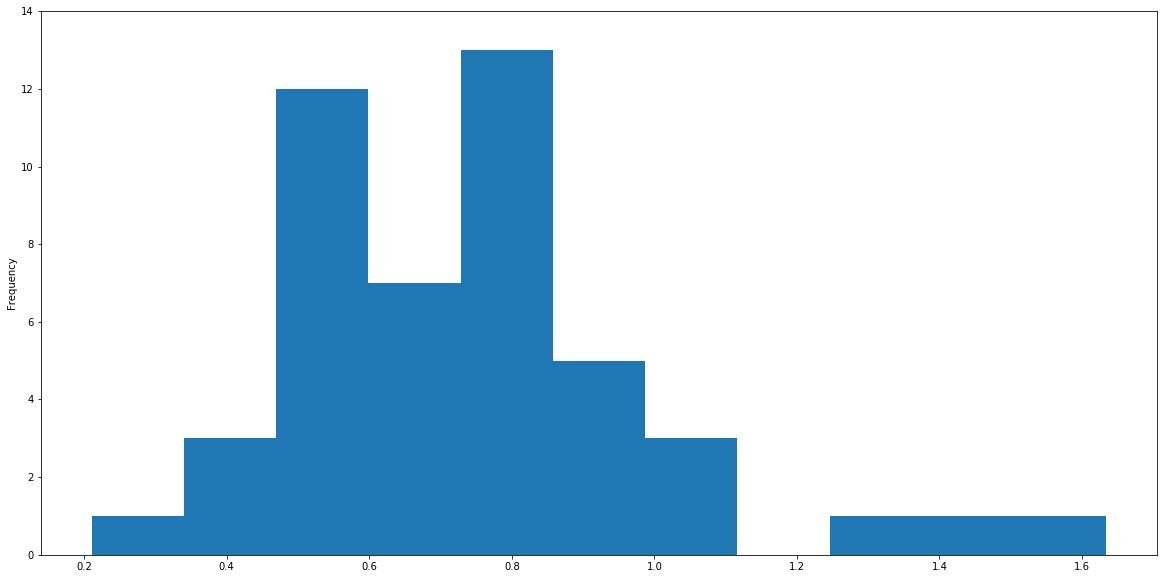

In [4]:
# Activity of gene 136 on ALL (acute lymphoblastic leukemia) patients
col_names = df_leuk.columns
print('ALL Scores')
df_leuk[[col for col in col_names if 'ALL' in col]].iloc[135].plot.hist(figsize=(20,10), bins=11, ylim=(0,14))
print('mean: ' + str(df_leuk[[col for col in col_names if 'ALL' in col]].iloc[135].mean())) 

AML Scores
mean: 0.94997308076


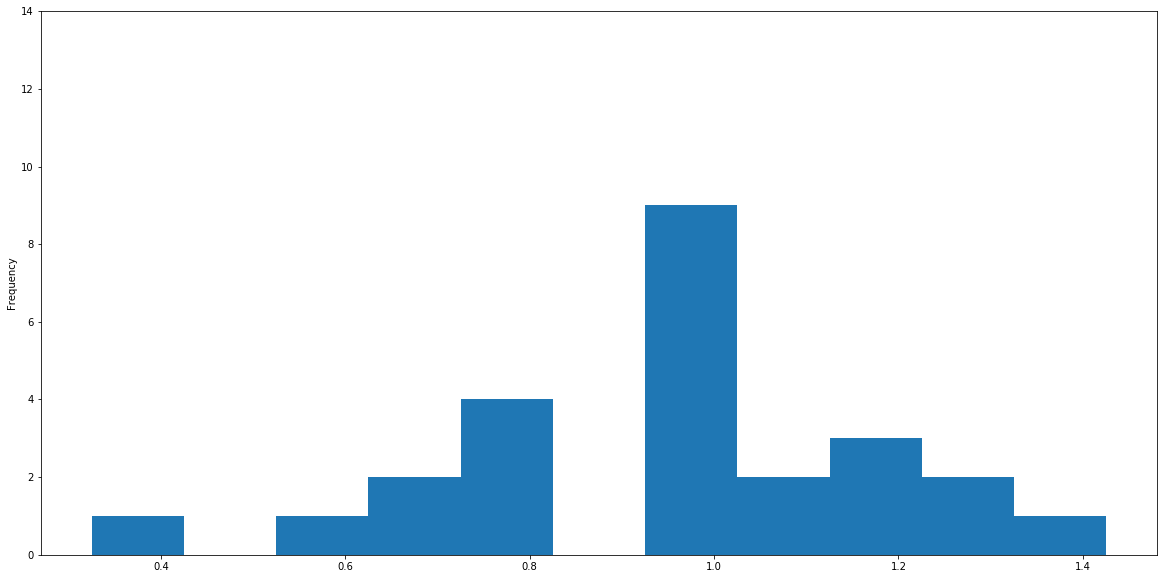

In [5]:
# Activity of gene 136 on AML (acute myeloid leukemia) patients
col_names = df_leuk.columns
print('AML Scores')
df_leuk[[col for col in col_names if 'AML' in col]].iloc[135].plot.hist(figsize=(20,10), bins=11, ylim=(0,14))
print('mean: ' + str(df_leuk[[col for col in col_names if 'AML' in col]].iloc[135].mean())) 

In [29]:
# t-student test for means
g136_all_bar = df_leuk[[col for col in col_names if 'ALL' in col]].iloc[135]
g136_aml_bar = df_leuk[[col for col in col_names if 'AML' in col]].iloc[135]
# If assume same variances, then 
stats.ttest_ind(df_leuk[[col for col in col_names if 'AML' in col]].iloc[135], df_leuk[[col for col in col_names if 'ALL' in col]].iloc[135])

Ttest_indResult(statistic=3.0140025758673397, pvalue=0.0035885675237623082)

### So, it would look like we had very strong evidence of difference in gene 136 expression depending on diagnosis. Right?

#### Well, not so quickly

In [36]:
t_stats = list()
for row in range(0, df_leuk.shape[0]):
    t_stats.append(stats.ttest_ind(df_leuk[[col for col in col_names if 'AML' in col]].iloc[row], df_leuk[[col for col in col_names if 'ALL' in col]].iloc[row])[0])

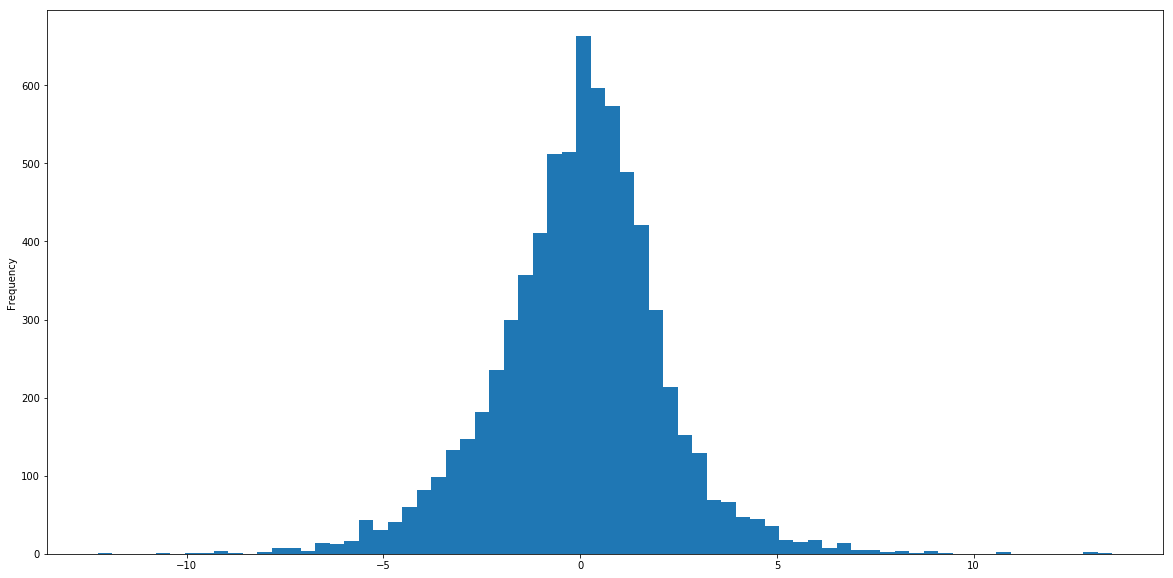

In [78]:
t_stats = pd.Series(t_stats)
t_stats.plot.hist(figsize=(20,10), bins=70)

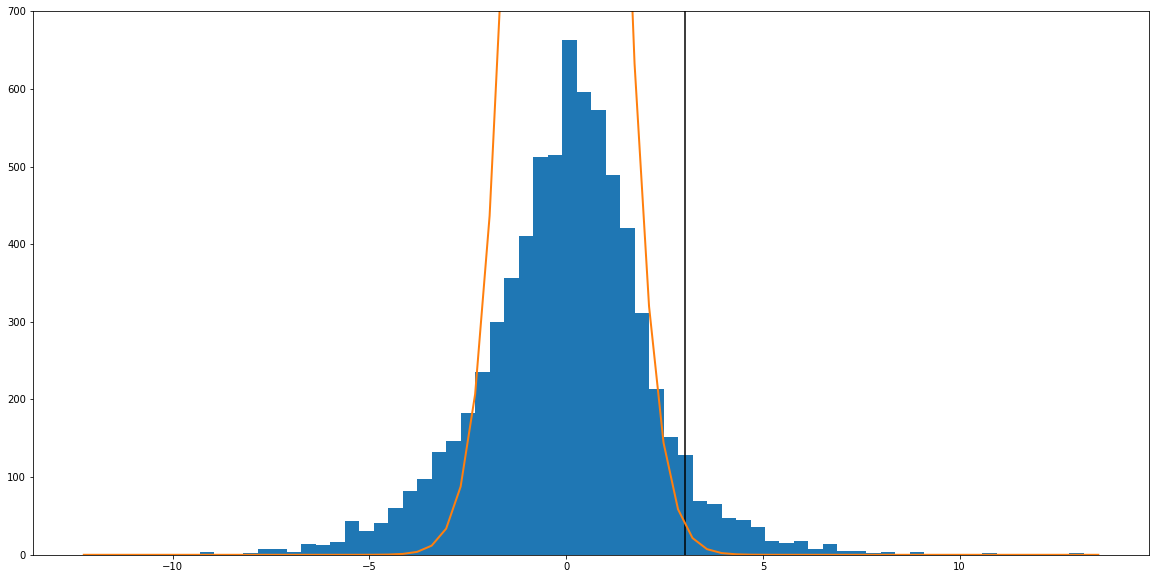

In [88]:
# Seems t-student with 70 dof not as good after all...
mean, std_e, dof = 0, 1, 70
plt.figure(figsize=(20,10))
plt.ylim((0,700))
plt.axvline(x=3.01, color='black')
myHist = plt.hist(t_stats, 70, normed=False)
rv = stats.t.pdf(myHist[1],dof,loc=mean, scale=1) * df_leuk.shape[0]
x = myHist[1]
h = plt.plot(x, rv, lw=2)
plt.show()